In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [6]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv初始讀檔為BGR,故轉成RGB

## 1-1. cluster with only RGB values

In [12]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[107.74203793  95.60812971  71.63680878]
 [163.22822298 197.73519054 120.58687239]]


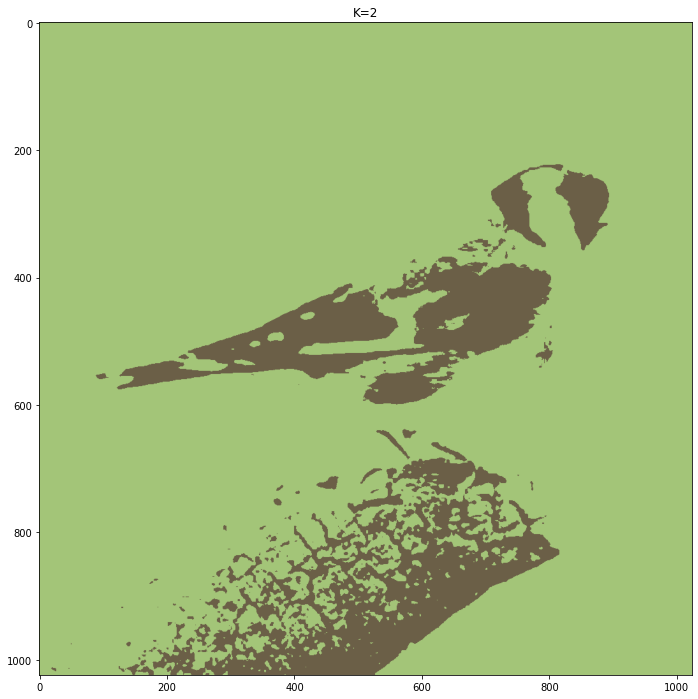

In [26]:
h, w, c = img.shape
#print(img.shape) #資料筆數為1024x1024
Z = img.reshape((-1,3)) #降一個維度，並用1024x1024取代
#print(Z.shape)
#print(Z)

K = 2

label, center = km_clust(Z,K)
# convert bakt into uint8, and make original image
# 因為pixel上的資料不會有小數點，為1或0
center = np.uint8(center[:,:3]) #把函數km_clust得到的center值轉成unit8
center
res = center[label.flatten()] # flatten = 降成一維
res = res.reshape(img.shape)

plt.figure(figsize=(16,12))
plt.title("K={}".format(K))
plt.imshow(res)

[[163.22597756 197.72311134 120.58332123]
 [107.69008695  95.56129696  71.60061825]]
[[143.73489877 128.09180565  96.98831743]
 [160.65558673 204.7559657  114.71312811]
 [183.89020152 182.63241543 164.80321831]
 [ 57.841624    54.7818794   45.96292607]]
[[154.66143437 192.87700437 110.8712719 ]
 [113.93330974  98.29018181  66.80953344]
 [169.41534451 163.16412166 141.19911856]
 [148.33519964 132.58162339 102.60193088]
 [197.82891992 198.88198731 186.23413087]
 [220.26106716 190.74819054  36.86719408]
 [163.46392998 211.86276667 117.71286093]
 [ 37.79468465  40.15246982  40.88833457]]
[[178.65749767 200.92337035 142.03030431]
 [117.45483182 105.71253775  75.08015724]
 [ 26.32748139  27.42077155  26.05198568]
 [169.64965922 164.1434623  144.93228479]
 [187.52586005 187.12277674 176.14767143]
 [214.86026486 214.48437602 207.62933003]
 [140.78212317 182.24500359 107.45768033]
 [159.00756732 144.91515429 117.19758566]
 [227.96955061 201.84943301  36.79840403]
 [159.09959994 206.92309123 112

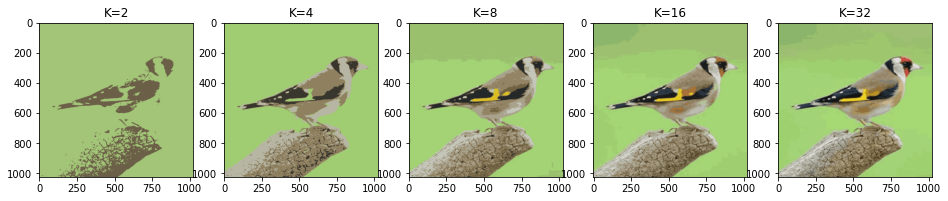

In [27]:
# K = 2,4,8,16,32

h, w, c = img.shape
Z = img.reshape((-1,3))
Ka = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka): # enumerate = 同時讀位置和資料
    label, center = km_clust(Z,K)
    center = np.uint8(center[:,:3]) #把函數km_clust得到的center值轉成unit8
    res = center[label.flatten()] # flatten = 降成一維
    res = res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1) #把所有圖集在同一張
    plt.title("K={}".format(K))
    plt.imshow(res)
plt.show()

## 1-2. cluster with RGB values and the location

[[154.51412839 186.76070071 117.16013511 509.91746946 254.35564867]
 [156.37238345 180.0972775  110.31595867 513.06834736 766.33973546]]
[[157.3076055  183.276892   111.52911069 767.24941855 768.82058864]
 [151.85472762 194.0518442  111.33345571 255.8121532  254.10652211]
 [155.56523424 177.49846295 109.31630486 255.560606   765.89096277]
 [157.05582519 178.88392673 122.70475966 768.10731129 256.61075132]]
[[157.65342936 182.96234821 114.48588058 171.48628256 857.84745834]
 [148.33984438 187.72469201 110.74891933 516.54814395 242.34367402]
 [160.54031966 203.33220596 117.94969848 845.39182727 865.40827394]
 [152.42646063 194.74957587 112.01488421 176.6534929  161.17332041]
 [158.34735151 174.75772717 108.3114394  504.74340165 778.71944217]
 [146.52442388 144.67489459 104.27871953 818.97868055 521.12416253]
 [157.23434074 195.77756184 111.24905945 203.50118439 506.09929083]
 [164.66666943 188.84447395 134.43155493 849.51338367 166.65703618]]
[[174.98261037 207.28800378 128.98825544 396.

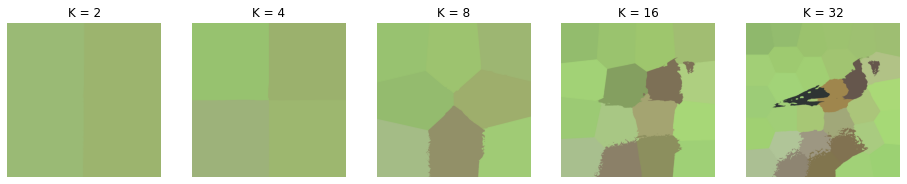

In [28]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)): # row
    for w in range(len(img[h])): # column
        Z[h][w] = np.append(img[h][w], [[h], [w]]) #img[h][w]=RGB值, [[h], [w]]=location 
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

In [34]:
print("1-1 只用RGB → K增加，色彩數上升，各空間的色彩差異很大")
print("1-2 利用位置 → K增加，區塊增加，臨近區的顏色相近")

1-1 只用RGB → K增加，色彩數上升，各空間的色彩差異很大
1-2 利用位置 → K增加，區塊增加，臨近區的顏色相近


[[153.25561916 174.78081737 108.18622253 132.90718085 187.65694382]
 [157.90007194 193.07446761 119.91786738 122.24401683  60.97932791]]
[[157.91989258 192.7851933  112.34885652  45.85088257 124.4254907 ]
 [167.5655978  206.09928608 123.00905046 169.26592364 211.82021337]
 [166.10239738 199.68213536 129.65376953 168.05825796  51.50498843]
 [113.99427603 101.8854663   75.84100752 173.13797544 137.93590389]]
[[156.2036496  200.96449316 114.53984886  67.4539084   41.83855431]
 [166.63862185 198.48245116 122.23601736  56.57762892 220.67460967]
 [162.66254663 145.08       105.82687213 124.1924412  156.59214112]
 [164.60923258 211.33814075 120.37469856 194.53492144 212.31890426]
 [167.9807579  200.44088301 133.57883989 188.03617329  53.01162436]
 [ 47.09856985  48.01517447  45.9470049  116.68512979 136.68000103]
 [158.07386073 199.67353798 110.69048237  45.19526925 125.96321698]
 [132.15268474 119.83208234  90.23468299 218.45114415 127.90382841]]
[[161.44842066 208.92567738 117.16994671 188.

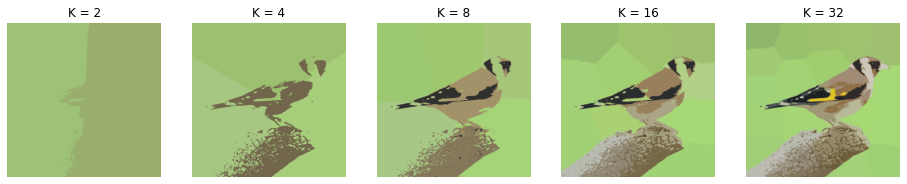

In [31]:
h, w, c = img.shape

#location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)): # row
    for w in range(len(img[h])): # column
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
        # 除以四(1024/4=256，將照片尺寸縮放成和pixel的範圍一樣(RGB:0-255)
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

In [36]:
s = '''調整後,較能找出正確的顏色，且對空間關係上也有較好的表現'''
print(s)

調整後,較能找出正確的顏色，且對空間關係上也有較好的表現
